In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
!pip install caer canaro --quiet

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-io 0.21.0 requires tensorflow-io-gcs-filesystem==0.21.0, which is not installed.
dask-cudf 21.10.1 requires cupy-cuda114, which is not installed.
beatrix-jupyterlab 3.1.7 requires google-cloud-bigquery-storage, which is not installed.
xarray-einstats 0.2.2 requires numpy>=1.21, but you have numpy 1.19.5 which is incompatible.
tfx-bsl 1.9.0 requires tensorflow!=2.0.*,!=2.1.*,!=2.2.*,!=2.3.*,!=2.4.*,!=2.5.*,!=2.6.*,!=2.7.*,!=2.8.*,<3,>=1.15.5, but you have tensorflow 2.6.4 which is incompatible.
tensorflow-transform 1.9.0 requires tensorflow!=2.0.*,!=2.1.*,!=2.2.*,!=2.3.*,!=2.4.*,!=2.5.*,!=2.6.*,!=2.7.*,!=2.8.*,<2.10,>=1.15.5, but you have tensorflow 2.6.4 which is incompatible.
tensorflow-serving-api 2.9.0 requires tensorflow<3,>=2.9.0, but you have tensorflow 2.6.4 which is incompatible.
pytorch-lightni

In [3]:
import caer 
import canaro
import gc
import cv2 as cv

In [4]:
IMG_SIZE = (80,80) # Generally OpenCV projects wants to all the images size to be one, so change it acordingly
channels = 1 # Since we are usign gray images
char_path = r'../input/the-simpsons-characters-dataset/simpsons_dataset'

In [5]:
# Now lets take all the directories of dataset and sort them out with most images
char_dict = {} # Empty dictionary

for char in os.listdir(char_path):
    char_dict[char] = len(os.listdir(os.path.join(char_path, char)))
    

# Sort the dictionary in Descending order
char_dict = caer.sort_dict(char_dict, descending = True)
char_dict

[('homer_simpson', 2246),
 ('ned_flanders', 1454),
 ('moe_szyslak', 1452),
 ('lisa_simpson', 1354),
 ('bart_simpson', 1342),
 ('marge_simpson', 1291),
 ('krusty_the_clown', 1206),
 ('principal_skinner', 1194),
 ('charles_montgomery_burns', 1193),
 ('milhouse_van_houten', 1079),
 ('chief_wiggum', 986),
 ('abraham_grampa_simpson', 913),
 ('sideshow_bob', 877),
 ('apu_nahasapeemapetilon', 623),
 ('kent_brockman', 498),
 ('comic_book_guy', 469),
 ('edna_krabappel', 457),
 ('nelson_muntz', 358),
 ('lenny_leonard', 310),
 ('mayor_quimby', 246),
 ('waylon_smithers', 181),
 ('maggie_simpson', 128),
 ('groundskeeper_willie', 121),
 ('barney_gumble', 106),
 ('selma_bouvier', 103),
 ('carl_carlson', 98),
 ('ralph_wiggum', 89),
 ('patty_bouvier', 72),
 ('martin_prince', 71),
 ('professor_john_frink', 65),
 ('snake_jailbird', 55),
 ('cletus_spuckler', 47),
 ('rainier_wolfcastle', 45),
 ('simpsons_dataset', 42),
 ('agnes_skinner', 42),
 ('sideshow_mel', 40),
 ('otto_mann', 32),
 ('fat_tony', 27),
 (

In [6]:
# Take top 10 elements names and add to a list
characters = []
count=0
for i in char_dict:
    characters.append(i[0])
    count += 1
    if count >= 10:
        break

display(characters)

['homer_simpson',
 'ned_flanders',
 'moe_szyslak',
 'lisa_simpson',
 'bart_simpson',
 'marge_simpson',
 'krusty_the_clown',
 'principal_skinner',
 'charles_montgomery_burns',
 'milhouse_van_houten']

## Creating Training Data

In [7]:
train = caer.preprocess_from_dir(char_path, characters, IMG_SIZE = IMG_SIZE, channels = channels, isShuffle=True)

[INFO] Could not find a file to load from. Generating the training data
----------------------------------------------
[INFO] At 1000 files
[INFO] At 2000 files
[INFO] 2246 files found in 2.8301503658294678s
[INFO] At 1000 files
[INFO] 1454 files found in 0.9471747875213623s
[INFO] At 1000 files
[INFO] 1452 files found in 0.8801054954528809s
[INFO] At 1000 files
[INFO] 1354 files found in 0.6026644706726074s
[INFO] At 1000 files
[INFO] 1342 files found in 0.5654315948486328s
[INFO] At 1000 files
[INFO] 1291 files found in 0.4197261333465576s
[INFO] At 1000 files
[INFO] 1206 files found in 0.17967915534973145s
[INFO] At 1000 files
[INFO] 1194 files found in 0.16088056564331055s
[INFO] At 1000 files
[INFO] 1193 files found in 0.138627290725708s
[INFO] At 1000 files
[INFO] 1079 files found in 0.0035676956176757812s
----------------------------------------------
[INFO] 13811 files preprocessed! Took 2m 26s


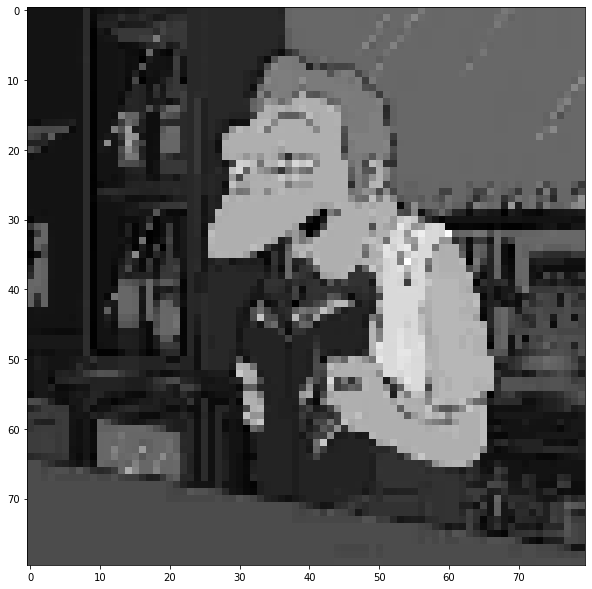

In [8]:
# Lets see the image
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10,15))
plt.imshow(train[0][0], cmap='gray')
plt.show()

In [9]:
featureSet, labels =  caer.sep_train(train, IMG_SIZE = IMG_SIZE)

In [10]:
from tensorflow.keras.utils import to_categorical # OneHot Encoder

# Normalize featureSet ==> (0, 1)
featureSet = caer.normalize(featureSet)
labels = to_categorical(labels, len(characters))

In [11]:
train_X, test_X, train_y, test_y = caer.train_val_split(featureSet, labels)

In [12]:
# Delete some variables from memory which we are not using
del train
del featureSet
del labels
gc.collect()

23

In [13]:
BATCH_SIZE = 35
EPOCHS = 10
# Image data generator
datagen = canaro.generators.imageDataGenerator()
train_gen = datagen.flow(train_X, train_y, batch_size = BATCH_SIZE)

In [14]:
# Creating the model 

model = canaro.models.createSimpsonsModel(IMG_SIZE = IMG_SIZE, channels = channels, output_dim = len(characters), loss = 'binary_crossentropy', decay = 1e-6, learning_rate = 0.001, momentum = 0.9, nesterov=True)

/opt/conda/lib/python3.7/site-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 80, 80, 32)        320       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 78, 78, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 39, 39, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 39, 39, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 39, 39, 64)        18496     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 37, 37, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 18, 18, 64)       

In [16]:
from tensorflow.keras.callbacks import LearningRateScheduler
callbacks_list = [LearningRateScheduler(canaro.lr_schedule)]

In [17]:
training = model.fit(train_gen, steps_per_epoch = len(train_X)//BATCH_SIZE, epochs = EPOCHS, 
                    validation_data = (test_X, test_y),
                     validation_steps = len(test_y)//BATCH_SIZE ,
                    callbacks = callbacks_list)

Epoch 1/10
315/315 [==============================] - 18s 33ms/step - loss: 0.3438 - accuracy: 0.1566 - val_loss: 0.3310 - val_accuracy: 0.1606
Epoch 2/10
315/315 [==============================] - 9s 28ms/step - loss: 0.3238 - accuracy: 0.1612
Epoch 3/10
315/315 [==============================] - 9s 29ms/step - loss: 0.3234 - accuracy: 0.1616
Epoch 4/10
315/315 [==============================] - 9s 27ms/step - loss: 0.3230 - accuracy: 0.1630
Epoch 5/10
315/315 [==============================] - 9s 28ms/step - loss: 0.3205 - accuracy: 0.1695
Epoch 6/10
315/315 [==============================] - 9s 29ms/step - loss: 0.3100 - accuracy: 0.2159
Epoch 7/10
315/315 [==============================] - 8s 27ms/step - loss: 0.3045 - accuracy: 0.2408
Epoch 8/10
315/315 [==============================] - 9s 27ms/step - loss: 0.3020 - accuracy: 0.2564
Epoch 9/10
315/315 [==============================] - 9s 29ms/step - loss: 0.2983 - accuracy: 0.2735
Epoch 10/10
315/315 [===========================

In [18]:
characters

['homer_simpson',
 'ned_flanders',
 'moe_szyslak',
 'lisa_simpson',
 'bart_simpson',
 'marge_simpson',
 'krusty_the_clown',
 'principal_skinner',
 'charles_montgomery_burns',
 'milhouse_van_houten']

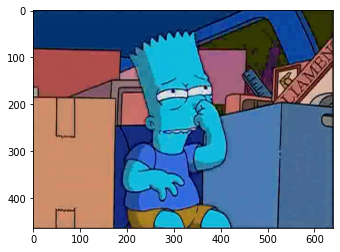

In [19]:
test_path = r'../input/the-simpsons-characters-dataset/simpsons_dataset/bart_simpson/pic_0019.jpg'
img = cv.imread(test_path)
plt.imshow(img, cmap='gray')
plt.show()

In [20]:
def prepare(image):
    image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    image = cv.resize(image, IMG_SIZE)
    image = caer.reshape(image, IMG_SIZE, 1)
    return image

In [21]:
predictions = model.predict(prepare(img))

In [22]:
# Getting class with the highest probability
print(characters[np.argmax(predictions[0])])

homer_simpson
